## PROMOTE GENDER EQUALITY AND EMPOWER WOMEN

## Análise Exploratória de Dados

In [55]:
from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## 1. Lendo os dados

In [56]:
# Dados incompletos coletados do site http://hdr.undp.org/en/content/developing-regions  (menu esquerda 'Download DB 2018')
filename = 'Dados/HDR_2018_data.xlsx'
first_data = pd.read_excel(filename)

# Dados coletados a partir de outra fonte para categorizar os países por região e tipo de renda
metadata_filename = 'Dados/HDR_2018_country_metadata.xlsx'
country_metadata = pd.read_excel(metadata_filename)

In [57]:
print(first_data.shape)
print(country_metadata.shape)

(25636, 34)
(217, 4)


In [58]:
first_data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [59]:
country_metadata.head()

,Code,Long Name,Income Group,Region
0,AFG,Islamic State of Afghanistan,Low income,South Asia
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia
2,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,ASM,American Samoa,Upper middle income,East Asia & Pacific
4,AND,Principality of Andorra,High income,Europe & Central Asia


In [60]:
# Fazemos merge para poder categorizar os dados por região e tipo de renda
data = pd.merge(left=first_data, right=country_metadata, how='left', left_on='iso3', right_on='Code')

# Evitamos redundâncias
data.drop('Code', axis=1, inplace=True) # 1 is the axis number (0 for rows and 1 for columns) & inplace to not have to reassign a new df

In [61]:
data.shape

(25636, 37)

In [62]:
data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,9999,Long Name,Income Group,Region
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168.0,168.0,NaN,Islamic State of Afghanistan,Low income,South Asia
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.0,68.0,NaN,Republic of Albania,Upper middle income,Europe & Central Asia
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,85.0,NaN,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,35.0,NaN,Principality of Andorra,High income,Europe & Central Asia
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145.0,147.0,NaN,People's Republic of Angola,Lower middle income,Sub-Saharan Africa


In [63]:
# Mudando o nome de algumas colunas
data.rename(columns={'dimension':'category','iso3':'code','Long Name':'long_name','Income Group':'income_group','Region':'region'},inplace=True)

In [64]:
data.head()

,category,indicator_id,indicator_name,code,country_name,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,9999,long_name,income_group,region
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168.0,168.0,NaN,Islamic State of Afghanistan,Low income,South Asia
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.0,68.0,NaN,Republic of Albania,Upper middle income,Europe & Central Asia
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,85.0,NaN,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,35.0,NaN,Principality of Andorra,High income,Europe & Central Asia
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145.0,147.0,NaN,People's Republic of Angola,Lower middle income,Sub-Saharan Africa


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25636 entries, 0 to 25635
Data columns (total 37 columns):
category          25636 non-null object
indicator_id      25636 non-null int64
indicator_name    25636 non-null object
code              25636 non-null object
country_name      25636 non-null object
1990              10073 non-null float64
1991              7454 non-null float64
1992              5740 non-null float64
1993              5986 non-null float64
1994              5808 non-null float64
1995              13849 non-null float64
1996              6217 non-null float64
1997              6347 non-null float64
1998              6384 non-null float64
1999              6462 non-null float64
2000              16612 non-null float64
2001              7556 non-null float64
2002              7582 non-null float64
2003              7627 non-null float64
2004              7708 non-null float64
2005              17048 non-null float64
2006              12885 non-null float64
2007   

Os dados parecem estar corretamente classificados, sendo:
* 'object' os dados de string
* 'int' e 'float64' os dados numéricos

## Convertendo o dataset

Segundo o princípio de 'tidy data':
* Colunas representas variaveis diferentes
* Linhas representam observacoes individuais

Então nosso dataset tem que ser modificado para ter nas colunas os dados que nos interessam.

In [66]:
# Criamos uma linha por pais, indicador e ano
data_per_year = pd.melt(frame=data, id_vars=['category','indicator_id','indicator_name','code', 'country_name','long_name','income_group','region'], var_name = 'year')

In [67]:
data_per_year.head()

,category,indicator_id,indicator_name,code,country_name,long_name,income_group,region,year,value
0,Composite indices,146206,HDI rank,AFG,Afghanistan,Islamic State of Afghanistan,Low income,South Asia,1990,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,Republic of Albania,Upper middle income,Europe & Central Asia,1990,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1990,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,Principality of Andorra,High income,Europe & Central Asia,1990,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,1990,NaN


In [68]:
data_per_year.shape

(743444, 10)

In [69]:
data_per_year.drop('indicator_id', axis=1, inplace=True)
data_per_year.drop('long_name', axis=1, inplace=True)

In [70]:
data_per_year.head()

,category,indicator_name,code,country_name,income_group,region,year,value
0,Composite indices,HDI rank,AFG,Afghanistan,Low income,South Asia,1990,NaN
1,Composite indices,HDI rank,ALB,Albania,Upper middle income,Europe & Central Asia,1990,NaN
2,Composite indices,HDI rank,DZA,Algeria,Upper middle income,Middle East & North Africa,1990,NaN
3,Composite indices,HDI rank,AND,Andorra,High income,Europe & Central Asia,1990,NaN
4,Composite indices,HDI rank,AGO,Angola,Lower middle income,Sub-Saharan Africa,1990,NaN


In [71]:
# 157 indicadores diferentes estudados
indicators = data.indicator_name.unique()
print(indicators.shape)

(157,)


In [72]:
# Diferentes indicadores de gênero estudados
gender_indicators = data[(data.category == 'Gender')].indicator_name.unique()
print(gender_indicators)

['Adolescent birth rate (births per 1,000 women ages 15-19)'
 'Antenatal care coverage, at least one visit (%)'
 'Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)'
 'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)'
 'Estimated gross national income per capita, female (2011 PPP $)'
 'Estimated gross national income per capita, male (2011 PPP $)'
 'Female share of employment in senior and middle management (%)'
 'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)'
 'Gender Development Index (GDI)' 'Gender Inequality Index (GII)'
 'Human Development Index (HDI), female'
 'Human Development Index (HDI), male'
 'Mandatory paid maternity leave (days)'
 'Maternal mortality ratio (deaths per 100,000 live births)'
 'Proportion of births attended by skilled health personnel (%)'
 'Share of employment in nonagriculture, female (%

In [73]:
# Depois desse comando, vamos ter um MultiIndex com uma linha por pais e ano e todos os indicadores em colunas
data_tidy = data_per_year.pivot_table(index=['code', 'country_name','income_group','region','year'],
                                     columns = 'indicator_name', values = 'value')

In [74]:
data_tidy.head(50)

indicator_name                                                 Adjusted net savings (% of GNI)  \
code country_name income_group        region             year                                    
AFG  Afghanistan  Low income          South Asia         1990                              NaN   
                                                         1991                              NaN   
                                                         1992                              NaN   
                                                         1993                              NaN   
                                                         1994                              NaN   
                                                         1995                              NaN   
                                                         1996                              NaN   
                                                         1997                              NaN   
                                                         1998                              NaN   
                                                         1999                              NaN   
                                                         2000                              NaN   
                                                         2001                              NaN   
                                                         2002                              NaN   
                                                         2003                              NaN   
                                                         2004                              NaN   
                                                         2005                              NaN   
                                                         2006                              NaN   
                                                         2007                              NaN   
                                                         2008                              NaN   
                                                         2009                              NaN   
                                                         2010                            -19.3   
                                                         2011                            -25.3   
                                                         2012                            -19.2   
                                                         2013                            -26.7   
                                                         2014                            -22.9   
                                                         2015                            -27.6   
                                                         2016                            -28.5   
                                                         2017                              NaN   
                                                         9999                            -28.5   
AGO  Angola       Lower middle income Sub-Saharan Africa 1990                            -48.0   
                                                         1991                              NaN   
                                                         1992                              NaN   
                                                         1993                              NaN   
                                                         1994                              NaN   
                                                         1995                              NaN   
                                                         1996                              NaN   
                                                         1997                              NaN   
                                                         1998                              NaN   
                                                         1999                   

In [75]:
data_tidy.shape

(5655, 156)

In [76]:
# Isso vai permitir voltar a um DataFrame normal
data_tidy.reset_index(inplace=True)

In [77]:
data_tidy.head()

indicator_name,code,country_name,income_group,region,year,Adjusted net savings (% of GNI),"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)",Birth registration (% under age 5),Carbon dioxide emissions (kg per 2011 PPP $ of GDP),...,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Urban population (%),"Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Vulnerable employment (% of total employment),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Working poor at PPP$3.10 a day (% of total employment),Young age (0-14) dependency ratio (per 100 people ages 15-64),Youth not in school or employment (% ages 15-24),Youth unemployment rate (female to male ratio)
0,AFG,Afghanistan,Low income,South Asia,1990,NaN,161.2,NaN,NaN,NaN,...,NaN,21.2,NaN,NaN,NaN,NaN,NaN,96.6,NaN,NaN
1,AFG,Afghanistan,Low income,South Asia,1991,NaN,NaN,NaN,NaN,NaN,...,NaN,21.3,NaN,NaN,62.0,NaN,98.9,96.5,NaN,1.01
2,AFG,Afghanistan,Low income,South Asia,1992,NaN,NaN,NaN,NaN,NaN,...,NaN,21.4,NaN,NaN,NaN,NaN,NaN,96.4,NaN,NaN
3,AFG,Afghanistan,Low income,South Asia,1993,NaN,NaN,NaN,NaN,NaN,...,NaN,21.4,NaN,NaN,NaN,NaN,NaN,96.4,NaN,NaN
4,AFG,Afghanistan,Low income,South Asia,1994,NaN,NaN,NaN,NaN,NaN,...,NaN,21.5,NaN,NaN,NaN,NaN,NaN,96.3,NaN,NaN


In [78]:
data_tidy.shape
# vemos que temos bem 1 linha por pais e ano pois : 5460 = 28 * 195 (195 paises e 28 anos estudados)

(5655, 161)

In [79]:
# Valores mais recentes para fazer análises numericas (o último ano do dataset é 2017) 
#recent_data = data_tidy[(data_tidy.year.isin([2017,9999]))]
recent_data = data_tidy[(data_tidy.year == 2017)]

In [80]:
recent_data.head()

indicator_name,code,country_name,income_group,region,year,Adjusted net savings (% of GNI),"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)",Birth registration (% under age 5),Carbon dioxide emissions (kg per 2011 PPP $ of GDP),...,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Urban population (%),"Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Vulnerable employment (% of total employment),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Working poor at PPP$3.10 a day (% of total employment),Young age (0-14) dependency ratio (per 100 people ages 15-64),Youth not in school or employment (% ages 15-24),Youth unemployment rate (female to male ratio)
27,AFG,Afghanistan,Low income,South Asia,2017,NaN,64.5,NaN,NaN,NaN,...,NaN,25.2,NaN,NaN,66.1,7.2,98.2,79.8,NaN,1.05
56,AGO,Angola,Lower middle income,Sub-Saharan Africa,2017,NaN,151.6,NaN,NaN,NaN,...,NaN,64.8,NaN,NaN,66.7,22.3,59.0,92.2,NaN,1.02
85,ALB,Albania,Upper middle income,Europe & Central Asia,2017,NaN,20.7,NaN,NaN,NaN,...,NaN,59.4,NaN,NaN,57.2,38.1,1.5,25.1,NaN,0.96
114,AND,Andorra,High income,Europe & Central Asia,2017,NaN,NaN,NaN,NaN,NaN,...,NaN,88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,ARE,United Arab Emirates,High income,Middle East & North Africa,2017,NaN,28.4,NaN,NaN,NaN,...,NaN,86.2,NaN,NaN,0.4,76.4,0.5,16.4,NaN,1.21


In [81]:
# Valores mais recentes de GÊNERO para fazer análises numéricas
gender_indicators = data[(data.category == 'Gender')].indicator_name.unique()
other_indicators = np.array(['code','country_name','income_group','region'])
recent_indicators = np.concatenate((other_indicators,gender_indicators))
recent_data_gender = recent_data[recent_indicators]
recent_data_gender

indicator_name,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)","Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",...,"Maternal mortality ratio (deaths per 100,000 live births)",Proportion of births attended by skilled health personnel (%),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)","Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
27,AFG,Afghanistan,Low income,South Asia,64.5,NaN,NaN,NaN,541.0,3030.0,...,396.0,NaN,11.6,27.4,1.59,NaN,NaN,NaN,7.2,1.05
56,AGO,Angola,Lower middle income,Sub-Saharan Africa,151.6,NaN,NaN,NaN,5063.0,6546.0,...,477.0,NaN,42.8,30.5,1.13,NaN,NaN,NaN,22.3,1.02
85,ALB,Albania,Upper middle income,Europe & Central Asia,20.7,NaN,NaN,NaN,9702.0,14028.0,...,29.0,NaN,37.5,27.9,0.93,NaN,NaN,NaN,38.1,0.96
114,AND,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,NaN,NaN
143,ARE,United Arab Emirates,High income,Middle East & North Africa,28.4,NaN,NaN,NaN,24973.0,84130.0,...,6.0,NaN,12.1,22.5,3.38,NaN,NaN,NaN,76.4,1.21
172,ARG,Argentina,High income,Latin America & Caribbean,62.8,NaN,NaN,NaN,12395.0,24789.0,...,52.0,NaN,40.1,38.9,1.49,NaN,NaN,NaN,50.8,1.17
201,ARM,Armenia,Upper middle income,Europe & Central Asia,23.2,NaN,NaN,NaN,6358.0,12281.0,...,25.0,NaN,42.4,18.1,1.23,NaN,NaN,NaN,40.9,1.18
230,ATG,Antigua and Barbuda,High income,Latin America & Caribbean,43.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
259,AUS,Australia,High income,East Asia & Pacific,12.9,NaN,NaN,NaN,35323.0,51857.0,...,6.0,NaN,46.6,32.7,1.04,NaN,NaN,NaN,99.2,0.91
288,AUT,Austria,High income,Europe & Central Asia,6.9,NaN,NaN,NaN,35626.0,55591.0,...,4.0,NaN,47.2,33.6,0.86,NaN,NaN,NaN,98.4,0.94


In [82]:
recent_data_gender.columns

Index(['code', 'country_name', 'income_group', 'region',
       'Adolescent birth rate (births per 1,000 women ages 15-19)',
       'Antenatal care coverage, at least one visit (%)',
       'Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)',
       'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)',
       'Estimated gross national income per capita, female (2011 PPP $)',
       'Estimated gross national income per capita, male (2011 PPP $)',
       'Female share of employment in senior and middle management (%)',
       'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)',
       'Gender Development Index (GDI)', 'Gender Inequality Index (GII)',
       'Human Development Index (HDI), female',
       'Human Development Index (HDI), male',
       'Mandatory paid maternity leave (days)',
       'Maternal mortality ratio (

In [83]:
recent_data_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 27 to 5653
Data columns (total 27 columns):
code                                                                                                                            195 non-null object
country_name                                                                                                                    195 non-null object
income_group                                                                                                                    195 non-null object
region                                                                                                                          195 non-null object
Adolescent birth rate (births per 1,000 women ages 15-19)                                                                       185 non-null float64
Antenatal care coverage, at least one visit (%)                                                                                 3 non-null float64
Child

Vemos que não há dados em 2017 sobre:
* Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)
* Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)
* Violence against women ever experienced, intimate partner (% of female population ages 15 and older)
* Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)


## seria legal analisar eles a parte, estao como year = 9999

In [84]:
recent_data_gender.shape

(195, 27)

In [85]:
recent_data_gender.drop('Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)',axis=1, inplace=True)
recent_data_gender.drop('Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)',axis = 1, inplace = True)
recent_data_gender.drop('Violence against women ever experienced, intimate partner (% of female population ages 15 and older)',axis = 1, inplace = True)
recent_data_gender.drop('Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)',axis = 1, inplace = True)
recent_data_gender.shape

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(195, 23)

## 2. Examinando dados

### 2.1. Dados numéricos

In [86]:
recent_data_gender.describe()

indicator_name,"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Female share of employment in senior and middle management (%),Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)",Proportion of births attended by skilled health personnel (%),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
count,185.000000,3.000000,10.00000,178.000000,178.000000,5.000000,164.000000,157.000000,164.000000,164.000000,176.000000,182.000000,3.000000,180.000000,193.000000,180.000000,10.000000,156.000000,180.000000
mean,46.852973,85.333333,34.19000,12742.584270,22140.573034,35.220000,0.936890,0.347191,0.690957,0.730848,107.806818,169.549451,56.600000,39.678333,21.391710,1.389889,26.230000,55.370513,1.093389
std,39.886016,17.406129,14.34685,14065.674425,23019.984673,3.100323,0.076412,0.189648,0.169039,0.146339,66.389131,232.733208,24.690281,11.448336,11.073365,0.907027,6.281905,29.149741,0.203720
min,0.300000,65.800000,13.40000,149.000000,594.000000,30.300000,0.425000,0.039000,0.223000,0.391000,0.000000,3.000000,41.700000,4.200000,0.100000,0.470000,14.500000,1.700000,0.630000
25%,13.400000,78.400000,26.17500,2548.750000,4926.500000,35.200000,0.908500,0.181000,0.567750,0.619750,84.000000,14.250000,42.350000,34.975000,13.100000,1.000000,23.025000,29.950000,0.980000
50%,37.500000,91.000000,33.65000,6763.000000,14243.000000,35.400000,0.960500,0.354000,0.728000,0.752500,98.000000,54.000000,43.000000,43.200000,20.000000,1.180000,26.950000,53.150000,1.070000
75%,69.500000,95.100000,37.92500,19326.000000,31722.750000,36.400000,0.986000,0.493000,0.824250,0.843000,119.250000,229.000000,64.050000,47.325000,28.500000,1.497500,29.475000,81.075000,1.180000
max,192.000000,99.200000,60.90000,69508.000000,135961.000000,38.800000,1.031000,0.834000,0.945000,0.953000,630.000000,1360.000000,85.100000,59.000000,55.700000,8.600000,38.000000,100.000000,2.500000


In [87]:
# Analisando as colunas que apresentaram menos de 10% (count < 19.5) dos dados preenchidos
recent_data_gender[['country_name','income_group','region','Antenatal care coverage, at least one visit (%)']].dropna()

indicator_name,country_name,income_group,region,"Antenatal care coverage, at least one visit (%)"
346,Burundi,Low income,Sub-Saharan Africa,99.2
2202,Haiti,Low income,Latin America & Caribbean,91.0
3710,Nigeria,Lower middle income,Sub-Saharan Africa,65.8


In [88]:
recent_data_gender[['country_name','income_group','region','Female share of employment in senior and middle management (%)']].dropna()

indicator_name,country_name,income_group,region,Female share of employment in senior and middle management (%)
694,Brazil,Upper middle income,Latin America & Caribbean,38.8
1477,Ecuador,Upper middle income,Latin America & Caribbean,35.2
2086,Guyana,Upper middle income,Latin America & Caribbean,35.4
3275,Mexico,Upper middle income,Latin America & Caribbean,36.4
4638,Serbia,Upper middle income,Europe & Central Asia,30.3


In [89]:
recent_data_gender[['country_name','income_group','region','Proportion of births attended by skilled health personnel (%)']].dropna()

indicator_name,country_name,income_group,region,Proportion of births attended by skilled health personnel (%)
346,Burundi,Low income,Sub-Saharan Africa,85.1
2202,Haiti,Low income,Latin America & Caribbean,41.7
3710,Nigeria,Lower middle income,Sub-Saharan Africa,43.0


In [90]:
recent_data_gender[['country_name','income_group','region','Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)']].dropna()

indicator_name,country_name,income_group,region,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)"
346,Burundi,Low income,Sub-Saharan Africa,29.7
433,Burkina Faso,Low income,Sub-Saharan Africa,29.1
1622,Ethiopia,Low income,Sub-Saharan Africa,22.8
1854,Ghana,Lower middle income,Sub-Saharan Africa,26.3
2202,Haiti,Low income,Latin America & Caribbean,38.0
2260,Indonesia,Lower middle income,East Asia & Pacific,14.5
3681,Niger,Low income,Sub-Saharan Africa,21.0
3710,Nigeria,Lower middle income,Sub-Saharan Africa,27.6
3826,Nepal,Low income,South Asia,23.7
5276,Uganda,Low income,Sub-Saharan Africa,29.6


In [91]:
# Removendo os indicadores que apresentam menos de 10% dos dados preenchidos
recent_data_gender.drop('Antenatal care coverage, at least one visit (%)',axis=1,inplace=True)
recent_data_gender.drop('Female share of employment in senior and middle management (%)',axis=1,inplace=True)
recent_data_gender.drop('Proportion of births attended by skilled health personnel (%)',axis=1,inplace=True)
recent_data_gender.drop('Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)',axis=1,inplace=True)
recent_data_gender.shape

(195, 19)

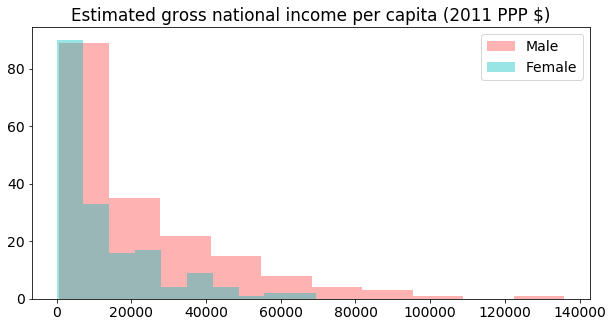

In [92]:
## Poderia ser usado para uma pergunta ?
rdg_income = recent_data_gender[['Estimated gross national income per capita, female (2011 PPP $)','Estimated gross national income per capita, male (2011 PPP $)']].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_income['Estimated gross national income per capita, male (2011 PPP $)'], color='r', alpha=0.3)
ax1.hist(rdg_income['Estimated gross national income per capita, female (2011 PPP $)'],   color='c', alpha=0.4)
ax1.set_title('Estimated gross national income per capita (2011 PPP $)')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

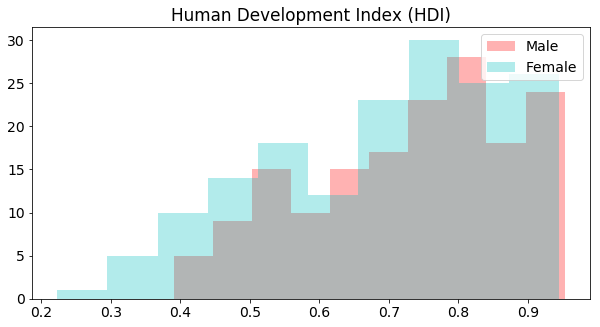

In [93]:
rdg_HDI = recent_data_gender[['Human Development Index (HDI), female','Human Development Index (HDI), male']].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_HDI['Human Development Index (HDI), male'], color='r', alpha=0.3)
ax1.hist(rdg_HDI['Human Development Index (HDI), female'],   color='c', alpha=0.3)
ax1.set_title('Human Development Index (HDI)')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

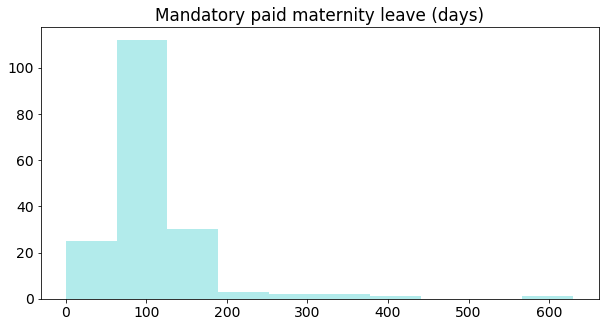

In [94]:
rdg_paidmaternity = recent_data_gender['Mandatory paid maternity leave (days)'].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_paidmaternity, color='c', alpha=0.3)
ax1.set_title('Mandatory paid maternity leave (days)')
pass

In [95]:
# Quais países apresentam mais de 600 dias de licença de maternidade remunerada obrigatória (dias)?
recent_data_gender[recent_data_gender['Mandatory paid maternity leave (days)'] >= 600]

indicator_name,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
4580,SMR,San Marino,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,NaN,NaN,26.7,NaN,NaN,NaN


In [96]:
# Quais países apresentam mais de 600 dias de licença de maternidade remunerada obrigatória (dias)?
recent_data_gender[recent_data_gender['Mandatory paid maternity leave (days)'] >= 365]

indicator_name,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
85,ALB,Albania,Upper middle income,Europe & Central Asia,20.7,NaN,9702.0,14028.0,0.970,0.238,0.772,0.796,365.0,29.0,37.5,27.9,0.93,38.1,0.96
491,BGR,Bulgaria,Upper middle income,Europe & Central Asia,39.5,NaN,14777.0,22930.0,0.990,0.217,0.808,0.816,410.0,11.0,47.8,23.8,0.87,73.6,0.99
578,BIH,Bosnia and Herzegovina,Upper middle income,Europe & Central Asia,10.0,NaN,7723.0,15856.0,0.924,0.166,0.739,0.800,365.0,11.0,32.7,19.3,2.09,54.7,1.23
4580,SMR,San Marino,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,NaN,NaN,26.7,NaN,NaN,NaN


### 2.2. Dados categóricos

In [97]:
# Todos os paises nao tem dados para todas as categorias
data['country_name'].value_counts(dropna=False)

Mexico                                 156
Viet Nam                               154
Brazil                                 154
Dominican Republic                     154
Colombia                               154
Thailand                               154
Moldova (Republic of)                  153
El Salvador                            153
Indonesia                              153
Albania                                153
Kyrgyzstan                             152
Algeria                                152
Ecuador                                152
Ghana                                  152
Ethiopia                               151
Philippines                            151
Tunisia                                151
Egypt                                  151
Peru                                   151
Armenia                                151
Ukraine                                151
Mongolia                               150
Serbia                                 150
Mozambique 

In [98]:
# Todos os indicadores nao tem o mesmo numero de respostas...
print(pd.DataFrame(data['indicator_name'].value_counts(dropna=False)))

                                                    indicator_name
Population using improved drinking-water source...             195
Urban population (%)                                           195
Total population (millions)                                    195
Population using improved sanitation facilities...             195
Red List Index (value)                                         195
Tuberculosis incidence (per 100,000 people)                    194
Expected years of schooling (years)                            193
Mortality rate, infant (per 1,000 live births)                 193
Infants lacking immunization, measles (% of one...             193
Mortality rate, under-five (per 1,000 live births)             193
Share of seats in parliament (% held by women)                 193
Infants lacking immunization, DPT (% of one-yea...             193
Homicide rate (per 100,000 people)                             193
Carbon dioxide emissions, per capita (tonnes)                 

In [99]:
#Numero de respostas por indicador de gênero
print(pd.DataFrame(data[(data.category == 'Gender')]['indicator_name'].value_counts(dropna=False)))

                                                    indicator_name
Share of seats in parliament (% held by women)                 193
Adolescent birth rate (births per 1,000 women a...             185
Proportion of births attended by skilled health...             182
Maternal mortality ratio (deaths per 100,000 li...             182
Youth unemployment rate (female to male ratio)                 180
Total unemployment rate (female to male ratio)                 180
Share of employment in nonagriculture, female (...             180
Estimated gross national income per capita, fem...             178
Mandatory paid maternity leave (days)                          178
Estimated gross national income per capita, mal...             178
Contraceptive prevalence, any method (% of marr...             170
Gender Development Index (GDI)                                 168
Human Development Index (HDI), female                          168
Human Development Index (HDI), male                           

### Visualizando

In [100]:
# obs: ao calcular a media, o panda não considera os valores NaN
rdg_income_grouped = recent_data_gender.groupby('income_group')
d = rdg_income_grouped["Share of seats in parliament (% held by women)"]
s = s.reindex(index = ['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
s.plot(kind='barh')

NameError: name 's' is not defined

### Examinando por categoria

## PERGUNTA 1 - Quais sao os paises com mais adolescentes grávidas ? 

In [ ]:
column_toPlot = 'Adolescent birth rate (births per 1,000 women ages 15-19)'
adolescentBirthRate = recent_data_gender[['country_name',column_toPlot]].dropna()

adolescentBirthRate = adolescentBirthRate.sort_values(by = column_toPlot, ascending = False)
adolescentBirthRate_max = adolescentBirthRate.head(15).sort_values(by = column_toPlot)
adolescentBirthRate_max.plot(kind='barh', x='country_name', y = column_toPlot, color='#446699', title = column_toPlot, legend = None)

In [ ]:
column_toPlot = 'Adolescent birth rate (births per 1,000 women ages 15-19)'

adolescentBirthRate2 = recent_data_gender[['country_name',column_toPlot,'income_group']].dropna() # acrescentamos income_group
adolescentBirthRate2.rename(columns={column_toPlot:'birth_rate'}, inplace=True)  # mais facil para filtrar no comando seguinte
adolescentBirthRate2_counts100 = adolescentBirthRate2[(adolescentBirthRate2.birth_rate >= 100)].income_group.value_counts()

#print(adolescentBirthRate2_counts100)
fig, ax = plt.subplots(figsize=(10, 5))
palette_race = {'Low income':'steelblue', 'Lower middle income': 'coral', 'Upper middle income' : 'green'}
plt.pie(x=adolescentBirthRate2_counts100, startangle=90, colors=list(palette_race.values()))
ax.set_title("Adolescent birth rate > 100 per income group")
_ = plt.legend(adolescentBirthRate2_counts100.index,title = 'Income groups',loc='center left', bbox_to_anchor=(1, 0.5))



Entre os que tem mais adolescentes gravidas, a maioria vem dos paises com 'Low Income'

## PERGUNTA 2 - Ainda nao sei mas algo de educacao

In [ ]:
# Valores mais recentes de EDUCACAO 
indicators = data[data.category.isin(['Education', 'Gender'])].indicator_name.unique()
other_indicators = np.array(['code','country_name','income_group','region'])
recent_indicators = np.concatenate((other_indicators,indicators))
recent_data_education_gender = recent_data[recent_indicators]
recent_data_education_gender

In [ ]:
recent_data_education_gender.info()

In [ ]:
gender_schooling = recent_data_education_gender[['Population with at least some secondary education, female (% ages 25 and older)','Population with at least some secondary education, male (% ages 25 and older)']].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(gender_schooling['Population with at least some secondary education, male (% ages 25 and older)'], color='r', alpha=0.3)
ax1.hist(gender_schooling['Population with at least some secondary education, female (% ages 25 and older)'],   color='c', alpha=0.3)
ax1.set_title('Mean years of schooling')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

In [ ]:
gender_schooling = recent_data_education_gender[['Population with at least some secondary education, female (% ages 25 and older)','Population with at least some secondary education, male (% ages 25 and older)']].dropna()
gender_schooling.rename(columns={'Population with at least some secondary education, male (% ages 25 and older)':'Male',
                                 'Population with at least some secondary education, female (% ages 25 and older)':'Female'}, inplace=True) 

gender_schooling.plot(kind = 'scatter',x = 'Male', y ='Female')

ax1.set_title('Secondary education')

#plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

## PERGUNTA 3 - blabla

In [ ]:
gender_schooling

## PERGUNTA 4 - blabla

## PERGUNTA 5 - blabla

## PERGUNTA 6 - blabla

## PERGUNTA 7 - blabla

## PERGUNTA 8 - blabla

## PERGUNTA 9 - blabla

## PERGUNTA 10 - blabla